# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
# Step 0: Necessary Imports

In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import random
import cv2
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.contrib.layers import flatten


from helping_FN import *

%matplotlib inline

---
# Step 1: Load The Data

In [2]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
validation_file="./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_Org, y_train_Org = train['features'], train['labels']
X_valid_Org, y_valid_Org = valid['features'], valid['labels']
X_test_Org, y_test_Org = test['features'], test['labels']

assert(len(X_train_Org) == len(y_train_Org))
assert(len(X_valid_Org) == len(y_valid_Org))
assert(len(X_test_Org) == len(y_test_Org))

---

# Step 2: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

n_train = len(X_train_Org) #Number of training examples
n_valid = len(X_valid_Org)
n_test = len(X_test_Org) #Number of testing examples.
image_shape = X_train_Org[0].shape #the shape of an traffic sign image?

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train_Org))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

### Related Functions in helping_FN.py:
- ** get_statistics(...)**
- ** show_images ( ... ) **


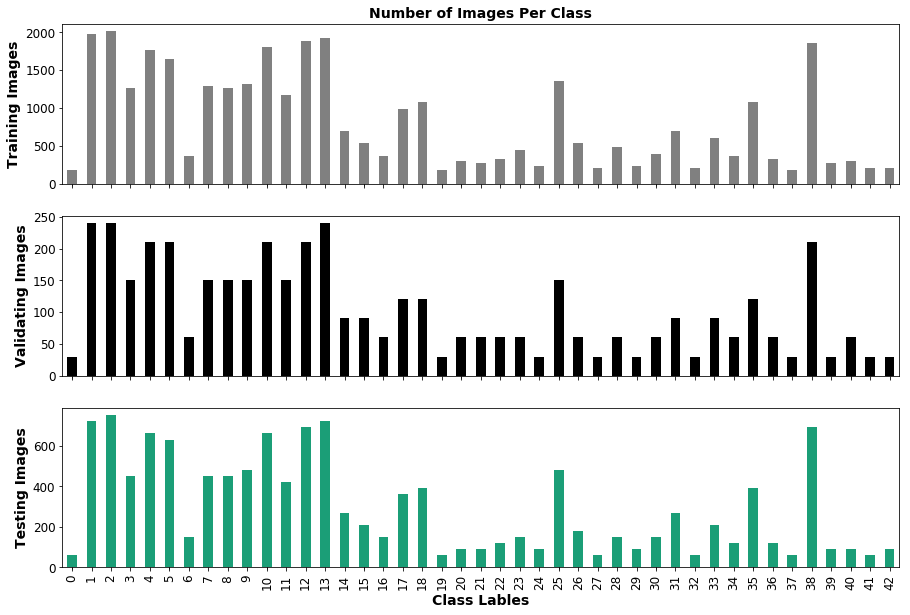

In [4]:
train_stat = get_statistics(y_train_Org)
valid_stat = get_statistics(y_valid_Org)
test_stat =  get_statistics(y_test_Org)

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15, 10))

axes[0].set_title('Number of Images Per Class', fontweight='bold', fontsize=14)
axes[2].set_xlabel("Class Lables", fontweight='bold', fontsize=14)


train_stat['img_count'].plot(ax=axes[0],kind='bar',   fontsize=12 , color='grey')
axes[0].set_ylabel('Training Images', fontweight='bold', fontsize=14)

valid_stat['img_count'].plot(ax=axes[1], kind='bar', fontsize=12, colormap='cubehelix')
axes[1].set_ylabel('Validating Images', fontweight='bold', fontsize=14)

test_stat['img_count'].plot(ax=axes[2], kind='bar', fontsize=12, colormap='Dark2')
axes[2].set_ylabel('Testing Images', fontweight='bold', fontsize=14)

fig.subplots_adjust(hspace=0.2)
plt.show()

### More combact plot for all data

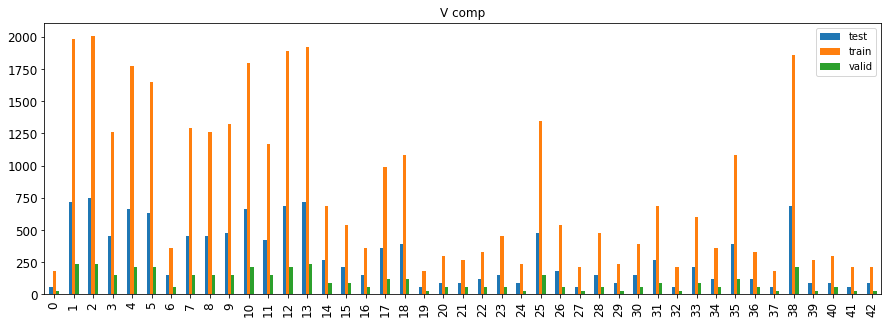

In [5]:
all_data = pd.DataFrame( {'train': train_stat['img_count'],
                         'valid': valid_stat['img_count'],
                         'test': test_stat['img_count']})
ax = all_data.plot(kind='bar', title ="V comp", figsize=(15, 5), legend=True, fontsize=12)

### Show Some Images and Their Labels

In [6]:
main_data = pd.read_csv('Project1_Data.csv', sep=';')
main_data.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


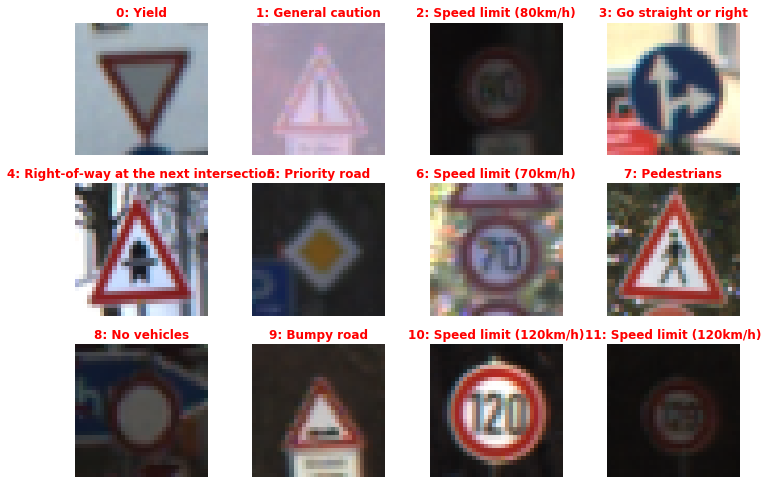

In [7]:
indx = random.sample(range(1, n_train), 12)

sel_labels = [y_train_Org[i]  for i in indx]
image_list = [X_train_Org[i] for i in indx ]

titles = [main_data['SignName'][i] for i in sel_labels]

show_images(np.array(image_list), np.array(titles), (10,7), size = (3,4) )

### NOTE 1:

Sample Images per label are not balanced. This should be adjusted shortly in data preproessing section. Imbalance classes like that will drive biased weights during training. **Suggested Solutions**:
- Adaptive dropout during training
- Adaptive increase in the number of samples

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

## Prepreocessing: 
## 1. Applied to All images

### Image Croping
1. It seems that most of the information is located in the center. 
2. crop around 10% of the edges
3. This is to be applied to all images

### Image Enhancement
1. Histogram equalization
2. Normalization
3. MAYBE TO BE TRIED OUT: Bluring & contrast adjustment
-------------------------


## 2. Applied to Subset of images
_This is to be applied to clasess that don't have much examples. The aim is to create a kind of a balance among variouz images within every label during training._

### Normalization
### Image Flipping, Rotation and Translatoin
1. Enriching the content by sharing information from different angles
2. Both random and normal filipping will be applied

### Adaptive Color Adjustment

1. For those images that do have lot of training examples, convert them to gray
2. For those with few number of examples per lable, work with individual channel. So each image will create 3 images

-------------
### Related Functions in helping_FN.py:
- ** convert_eq_gray (...)**
- ** adjust_images ( ... ) **
- ** generate_images (...) **
- ** get_Extended_Images (...) **
---

In [9]:
#Creating extended image and lable lists with the same format as the original input data
print("\nFor Training Set\n")
X_train_gray ,y_train_gray = get_Extended_Images(X_train_Org, y_train_Org)
#print("\nFor Validation Set\n")
#X_valid_gray ,y_valid_gray = get_Extended_Images(X_valid_Org, y_valid_Org)
#print("\nFor Testing Set\n")
#X_test_gray , y_test_gray =  get_Extended_Images(X_test_Org, y_test_Org)



For Training Set

The length before extendeing images = 34799 and the length of the assoc. label = 34799 
The length after extendeing images = 39418 and the length of the assoc. label = 39418 
--------------------------------------------------


In [10]:
X_valid_gray = np.array(convert_eq_gray(X_valid_Org))
y_valid_gray = np.copy(y_valid_Org)

X_test_gray = np.array(convert_eq_gray(X_test_Org))
y_test_gray = np.copy(y_test_Org)

## Visualizing the newly generated images

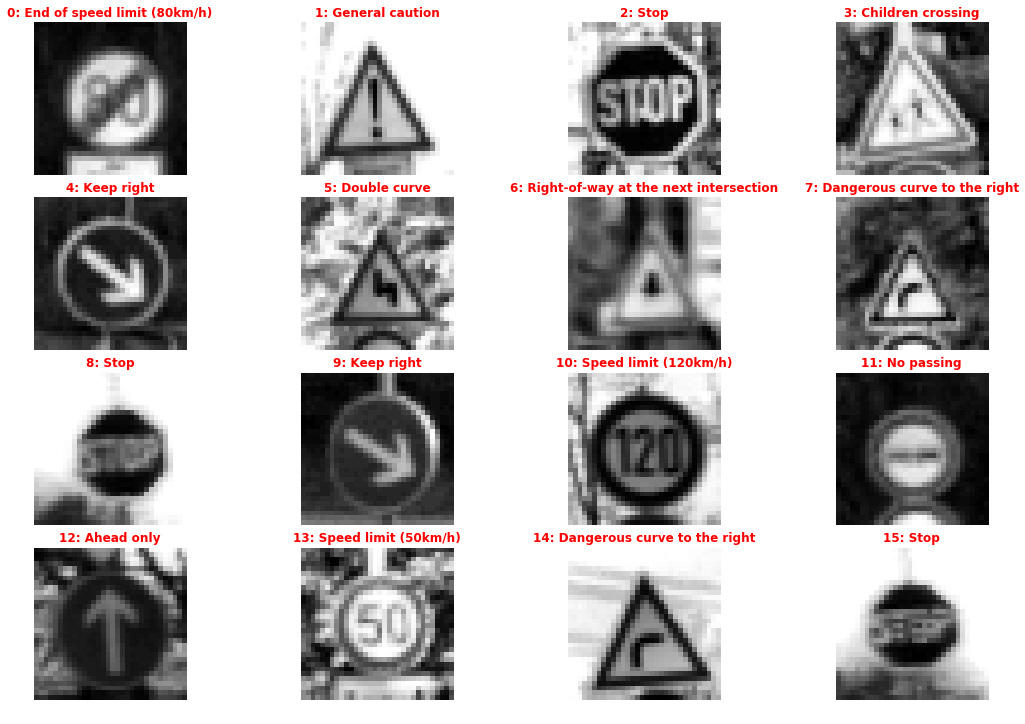

In [11]:
indx = random.sample(range(1, n_valid), 16)

sel_labels = [y_valid_gray[i]  for i in indx]
image_list = [X_valid_gray[i].squeeze() for i in indx ]

titles = [main_data['SignName'][i] for i in sel_labels]

show_images(np.array(image_list), np.array(titles), (15,10), size = (4,4) )

## Plotting the distribution of the newly generated images

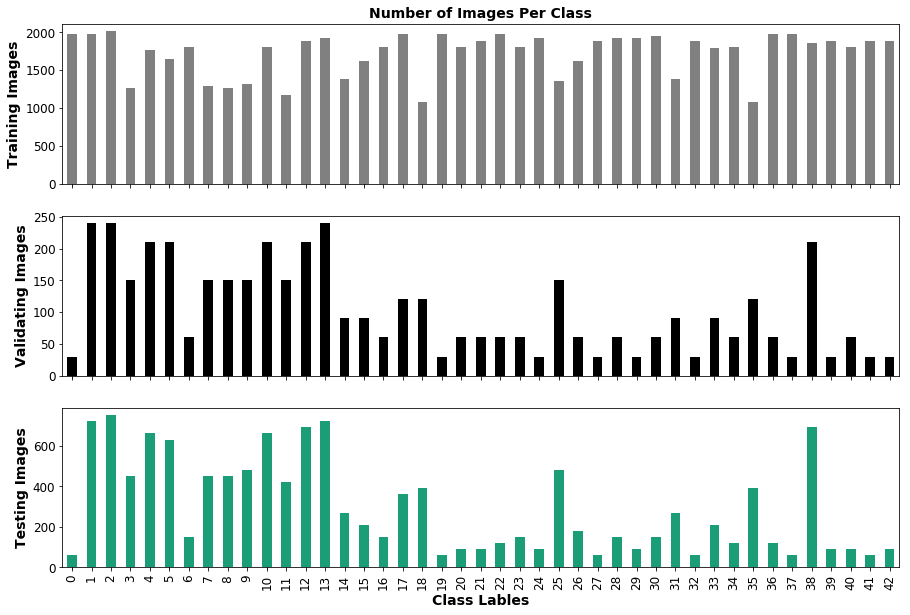

In [12]:
train_stat = get_statistics(y_train_gray)
valid_stat = get_statistics(y_valid_gray)
test_stat =  get_statistics(y_test_gray)

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15, 10))

axes[0].set_title('Number of Images Per Class', fontweight='bold', fontsize=14)
axes[2].set_xlabel("Class Lables", fontweight='bold', fontsize=14)


train_stat['img_count'].plot(ax=axes[0],kind='bar',   fontsize=12 , color='grey')
axes[0].set_ylabel('Training Images', fontweight='bold', fontsize=14)

valid_stat['img_count'].plot(ax=axes[1], kind='bar', fontsize=12, colormap='cubehelix')
axes[1].set_ylabel('Validating Images', fontweight='bold', fontsize=14)

test_stat['img_count'].plot(ax=axes[2], kind='bar', fontsize=12, colormap='Dark2')
axes[2].set_ylabel('Testing Images', fontweight='bold', fontsize=14)

fig.subplots_adjust(hspace=0.2)
plt.show()

# Selecting Images of Interest

In [13]:
#X_train_Org color Images
#X_train_gray gray extended images
"""
X_train = np.copy(X_train_Org)
y_train = np.copy(y_train_Org)

X_valid = np.copy(X_valid_Org)
y_valid = np.copy(y_valid_Org)

X_test = np.copy(X_test_Org)
y_test = np.copy(y_test_Org) 
"""

'\nX_train = np.copy(X_train_Org)\ny_train = np.copy(y_train_Org)\n\nX_valid = np.copy(X_valid_Org)\ny_valid = np.copy(y_valid_Org)\n\nX_test = np.copy(X_test_Org)\ny_test = np.copy(y_test_Org) \n'

In [14]:
X_train = np.copy(X_train_gray)
y_train = np.copy(y_train_gray)

X_valid = np.copy(X_valid_gray)
y_valid = np.copy(y_valid_gray)

X_test = np.copy(X_test_gray)
y_test = np.copy(y_test_gray) 

## Image Normaliztion
It was not necessary as I was using L2 Regularization

In [15]:
#Performing necessary normalization 2
#X_train = np.array(X_train / 255.0 - 0.5 )
#X_valid = np.array(X_valid / 255.0 - 0.5 )
#X_test = np.array(X_test / 255.0 - 0.5 )

---
# Model Architecture



In [16]:
EPOCHS = 30
BATCH_SIZE = 128 #128


tf.reset_default_graph()


In [17]:
def conv_layer(x, W, b,my_padding='VALID', strides=1, RELU=True):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=my_padding)
    x = tf.nn.bias_add(x, b)
    
    if(RELU):
        return tf.nn.relu(x)
    else:
        return x


def max_pool_layer(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')

def avg_pool_layer(x, k=2):
    return tf.nn.avg_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')

In [18]:
#x = tf.placeholder(tf.float32, (None, 32, 32, 3))
x = tf.placeholder(tf.float32, (None, 32, 32, 1))

y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# Probability for dropout
dropout = tf.placeholder(tf.float32) # 1x1 tensor for the drop out.

In [38]:

mu = 0
sigma = 0.1

weights = {
    
    'conv1_W'  : tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 8), mean = mu, stddev = sigma)),
    'conv2_W'  : tf.Variable(tf.truncated_normal(shape=(4, 4, 8, 16), mean = mu, stddev = sigma)),
    'conv3_W'  : tf.Variable(tf.truncated_normal(shape=(2, 2, 16, 24), mean = mu, stddev = sigma)),
    'Full_C1'  : tf.Variable(tf.truncated_normal(shape=(600, 600), mean = mu, stddev = sigma)),
    'Full_C2'  : tf.Variable(tf.truncated_normal(shape=(600,215), mean = mu, stddev = sigma)),
    'output'   : tf.Variable(tf.truncated_normal(shape=(215, n_classes), mean = mu, stddev = sigma))
        
}
 
biases = {
    
    'conv1_b': tf.Variable(tf.random_normal([8])),
    'conv2_b': tf.Variable(tf.random_normal([16])),
    'conv3_b': tf.Variable(tf.random_normal([24])),
    'fc1_b': tf.Variable(tf.random_normal([600])),
    'fc2_b': tf.Variable(tf.random_normal([215])),
    
    'output_b': tf.Variable(tf.random_normal([n_classes]))
}


print(x.get_shape().as_list() )



#--------------------------------------------------------------------------------
# Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x8.  Filter.S 3x3  St. 1
#--------------------------------------------------------------------------------

conv1 = conv_layer(x, weights['conv1_W'], biases['conv1_b'], strides=1)
#conv1 = tf.nn.dropout(conv1, dropout)
conv1 = avg_pool_layer(conv1, k=2)


#--------------------------------------------------------------------------------
# Layer 2: Convolutional. Input = 15x15x8. Output = 12x12x16. Filter.S 4x4  St. 1
#--------------------------------------------------------------------------------
conv2 = conv_layer(conv1, weights['conv2_W'], biases['conv2_b'])
#conv2 = tf.nn.dropout(conv2, dropout)
conv2 = avg_pool_layer(conv2, k=1) 



#--------------------------------------------------------------------------------
# Layer 3: Convolutional. Input = 12x12x16. Output = 10x10x24. Filter.S 2x2  St. 1
#--------------------------------------------------------------------------------

conv3   = conv_layer(conv2,weights['conv3_W'], biases['conv3_b'] )
#conv3 = tf.nn.dropout(conv3, dropout)
conv3 = avg_pool_layer(conv3, k=2) 

#--------------------------------------------------------------------------------
# Layer 4: Fully Connected. Input = 5x5x24 = 600. Output = 600
#--------------------------------------------------------------------------------

flatten_layer   = flatten(conv3)


fc1 = tf.add(tf.matmul(flatten_layer, weights['Full_C1'] ), biases['fc1_b'])
fc1 = tf.nn.relu(fc1)

#--------------------------------------------------------------------------------
# Layer 5: Fully Connected. Input = 600. Output = 215
#--------------------------------------------------------------------------------

fc2 = tf.add(tf.matmul(fc1, weights['Full_C2']), biases['fc2_b'])
fc2 = tf.nn.relu(fc2)


#--------------------------------------------------------------------------------
# Layer 6: Output. Input = 215. Output = class prediction
#--------------------------------------------------------------------------------

logits = tf.add(tf.matmul(fc2, weights['output']), biases['output_b'])


[None, 32, 32, 1]


--------

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [20]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [50]:
"""
http://stackoverflow.com/questions/36706379/how-to-exactly-add-l1-regularisation-to-tensorflow-error-function
http://www.ritchieng.com/machine-learning/deep-learning/tensorflow/regularization/
"""

weights = tf.trainable_variables() # all vars of the graph

#l1_regularizer = tf.contrib.layers.l1_regularizer(  scale=0.005, scope=None )
#regularization_penalty = tf.contrib.layers.apply_regularization(l1_regularizer, weights) #l1

l2_regularizer = tf.contrib.layers.l2_regularizer(  scale=0.005, scope=None )
regularization_penalty = tf.contrib.layers.apply_regularization(l2_regularizer, weights) #l1



rate = 0.0004 #0.004 


cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)


regularized_loss = loss_operation + regularization_penalty # this loss needs to be minimized

optimizer = tf.train.AdamOptimizer(learning_rate = rate)

#optimizer = tf.train.AdagradOptimizer(learning_rate= rate)

training_operation = optimizer.minimize(regularized_loss)


In [51]:
#validation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    my_loss = 0
    
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, dropout: 1.0})
        
        my_loss += (loss * len(batch_x))
        total_accuracy += (accuracy * len(batch_x))
        
        
    return (my_loss/ num_examples), (total_accuracy / num_examples)

In [52]:
import time
start_time = time.time() #stackoverflow 

#Training

train_loss_List = []
valid_loss_List = []
train_accuracy_List = []
valid_accuracy_List = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = n_train
    
        
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            
                       
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout : 1.0})
            
            
            
        train_loss, train_accuracy = evaluate(X_train, y_train)
        valid_loss, valid_accuracy = evaluate(X_valid, y_valid)
        
        train_loss_List.append(train_loss)
        train_accuracy_List.append(train_accuracy)

        valid_loss_List.append(valid_loss)
        valid_accuracy_List.append(valid_accuracy)
   
        print("EPOCH {} ...".format(i+1))
        print("Train loss = {:.3f}".format(train_loss))
        print("Train accuracy = {:.3f}".format(train_accuracy))
        print("Valid loss = {:.3f}".format(valid_loss))
        print("Valid accuracy = {:.3f}".format(valid_accuracy))
        print("Time: %.3f seconds" % (time.time() - start_time))
        print()
        
        
    saver.save(sess, './CarNet')
    print("Model saved")

print()
print("***********************************************")    
print("Training This Network Arch. took {:.2f} minutes".format((time.time() - start_time)/60.0) )
print("***********************************************")    

Training...

EPOCH 1 ...
Train loss = 1.494
Train accuracy = 0.611
Valid loss = 1.151
Valid accuracy = 0.694
Time: 15.318 seconds

EPOCH 2 ...
Train loss = 0.868
Train accuracy = 0.764
Valid loss = 0.641
Valid accuracy = 0.824
Time: 28.834 seconds

EPOCH 3 ...
Train loss = 0.657
Train accuracy = 0.812
Valid loss = 0.562
Valid accuracy = 0.830
Time: 42.416 seconds

EPOCH 4 ...
Train loss = 0.495
Train accuracy = 0.863
Valid loss = 0.376
Valid accuracy = 0.897
Time: 56.109 seconds

EPOCH 5 ...
Train loss = 0.409
Train accuracy = 0.887
Valid loss = 0.392
Valid accuracy = 0.887
Time: 69.918 seconds

EPOCH 6 ...
Train loss = 0.359
Train accuracy = 0.900
Valid loss = 0.338
Valid accuracy = 0.907
Time: 83.800 seconds

EPOCH 7 ...
Train loss = 0.304
Train accuracy = 0.918
Valid loss = 0.276
Valid accuracy = 0.920
Time: 97.792 seconds

EPOCH 8 ...
Train loss = 0.282
Train accuracy = 0.922
Valid loss = 0.274
Valid accuracy = 0.922
Time: 111.938 seconds

EPOCH 9 ...
Train loss = 0.269
Train accur

## Visualizing Both Loss and Accuracy

[utilized from various matplotlib exampls](http://matplotlib.org/examples/)

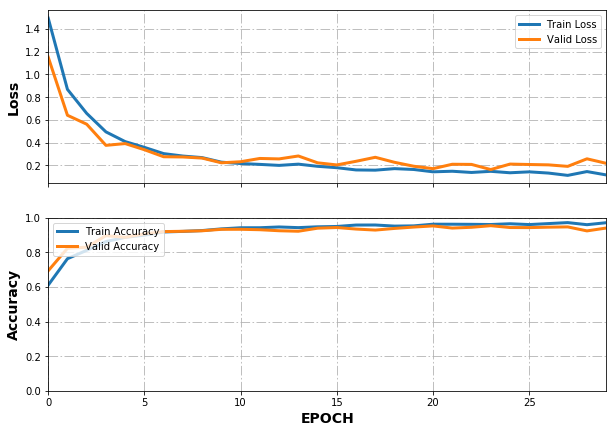

In [53]:
f, ax = plt.subplots(2, sharex=True, figsize = (10,7))

#configuring first plot
#------------------------

#ax[0].set_title('EPOCH')

T_loss, = ax[0].plot(train_loss_List, label='Train Loss', linewidth=3 )
V_loss, = ax[0].plot(valid_loss_List, label='Valid Loss', linewidth=3)

ax[0].grid(True)
ax[0].set_xlim([0, EPOCHS-1])
ax[0].legend(handles=[T_loss,V_loss ],loc =1)

ax[0].set_ylabel('Loss', fontweight='bold', fontsize=14)

f1_gridlines = ax[0].get_xgridlines() + ax[0].get_ygridlines()

for line in f1_gridlines:
    line.set_linestyle('-.')

#configuring Second plot
#------------------------

T_acc, = ax[1].plot(train_accuracy_List, label='Train Accuracy', linewidth=3)
V_acc, = ax[1].plot(valid_accuracy_List, label='Valid Accuracy', linewidth=3)

ax[1].grid(True)
ax[1].set_ylim([0, 1])
ax[1].legend(handles=[T_acc,V_acc ],loc =2)


ax[1].set_xlabel('EPOCH', fontweight='bold', fontsize=14)
ax[1].set_ylabel('Accuracy', fontweight='bold', fontsize=14)

f2_gridlines = ax[1].get_xgridlines() + ax[1].get_ygridlines()

for line in f2_gridlines:
    line.set_linestyle('-.')


#-------------------------------------------
# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace=0.2)


plt.show()

# Testing The Model

In [54]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    loss,test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.911


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

# Load images from drive 
originally downloaed from google with permission to use and edit


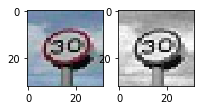

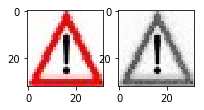

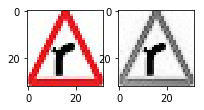

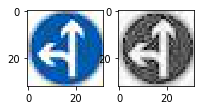

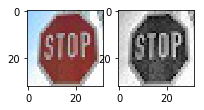

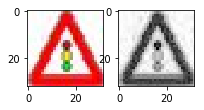

In [63]:
#http://stackoverflow.com/questions/30230592/loading-all-images-using-imread-from-a-given-folder

import os

def loadImages(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images


path = "./Extra_Images/"

extra_labels = np.array([1,18,20,37,14,26 ],dtype='uint8') #hard coded from the accompying file

Ext_imges_Color = loadImages(path)
Ext_imgs2gray = np.asarray(convert_eq_gray(Ext_imges_Color))

for img, img_gray in zip(Ext_imges_Color,Ext_imgs2gray) :
   
    fig ,(ax1,ax2) = plt.subplots(1,2 , figsize=(3, 3))
   
    ax1.imshow(img)
    ax1.autoscale(False)
       
    ax2.imshow(img_gray.squeeze(),cmap='gray')
    ax2.autoscale(False)

    plt.show()


### Predict the Sign Type for Each Image

In [27]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
#------------------------------------------------------------

### Extra Processing 

In [64]:
#-------------------------------------------------------------
#Additional_Images = np.copy(Ext_imges_Color) 
Additional_Images = np.copy(Ext_imgs2gray)

#Normalizing resulting images
#--------------------------------------------------------------
#Additional_Images = np.array(Additional_Images / 255.0 - 0.5 )

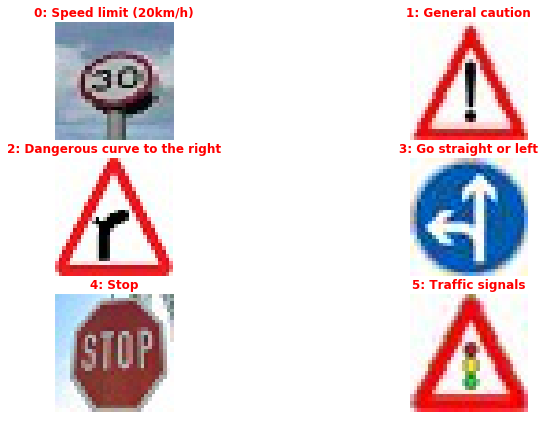

In [65]:
with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    pred_NewImages = sess.run(logits, feed_dict={x: np.array(Additional_Images), y: np.array(extra_labels), dropout : 1.0 })
    pred_Newlabels = np.argmax(pred_NewImages, axis=1)
    
pred_titles = np.array(main_data['SignName'][pred_Newlabels])
show_images(np.array(Ext_imges_Color), np.array(pred_titles), (10,6), size = (3,2) ) 

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [66]:
with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    loss,test_accuracy = evaluate(Additional_Images, extra_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.833


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [67]:
probs = tf.nn.softmax(pred_NewImages)
top_preditions = tf.nn.top_k(probs,5)

with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    Soft_Max_Probs = sess.run(probs)
    Top5pred = sess.run(top_preditions)



Speed limit (20km/h): 0.949
Keep left: 0.042
Speed limit (30km/h): 0.005
End of speed limit (80km/h): 0.001
Speed limit (50km/h): 0.001



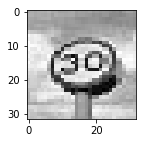

General caution: 1.000
Pedestrians: 0.000
Traffic signals: 0.000
Right-of-way at the next intersection: 0.000
Road narrows on the right: 0.000



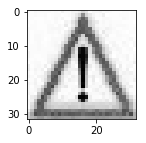

Dangerous curve to the right: 0.935
Dangerous curve to the left: 0.065
Children crossing: 0.000
Slippery road: 0.000
Beware of ice/snow: 0.000



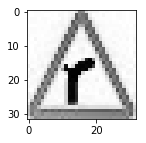

Go straight or left: 0.853
Go straight or right: 0.146
Turn right ahead: 0.000
Keep left: 0.000
Speed limit (20km/h): 0.000



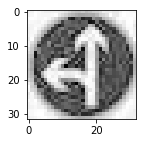

Stop: 0.613
Speed limit (20km/h): 0.116
Go straight or left: 0.084
Turn left ahead: 0.057
Turn right ahead: 0.038



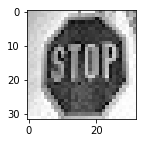

Traffic signals: 0.947
General caution: 0.051
Road narrows on the right: 0.001
Pedestrians: 0.000
Dangerous curve to the left: 0.000



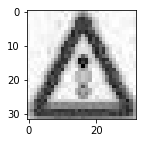

In [68]:
#new_titles = np.array(main_data['SignName'][extra_labels])
predictions,Top5_indx  = Top5pred[0], Top5pred[1]

for input_im_ind in range(Soft_Max_Probs.shape[0]):
    
    fig ,ax = plt.subplots(1,1 , figsize=(2, 2))
    
    for i in range(5):
        print("%s: %.3f" % (main_data['SignName'][Top5_indx[input_im_ind][i]], predictions[input_im_ind][i]))
    print()
    
    ax.imshow(Additional_Images[input_im_ind].squeeze(),'gray')
    plt.show()

---
# The following Section is Optional

---

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 